<div style="text-align: center;">
    <h1><strong>Physics 129L Final Project: Investigating the Outflow Dynamics of Active Galactic Nuclei through Computational Simulations</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>AGN Galaxy Simulation</strong></h3>
</div>
My goal of this project is to study the outflow dynamics of Active Galactic Nucleis (AGNs) since it is crucial for comprehending their roles in galaxy formation and evolution and aims to simulate the outflow properties of AGNs using computational techniques to understand their process and implications for galaxy evolution. 

However, before starting analyzing the properties of AGN, we need some sample of AGN host galaxies to start with, and this is one of the most complex process since there are too many things to be considered. We start by considering some most important factors of AGN host galaxies in the simulation:

1. **Modeling the Black Holes**: Simulating the behavior of supermassive black holes at the centers of these galaxies, including their mass, spin, and accretion rates.
2. **Modeling the Gas Dynamics**: Modeling the accretion of gas onto the black hole and the resulting jets and winds.
3. **Consider the Galactic Interactions**: Considering the gravitational interactions between galaxies, especially in dense environments like galaxy clusters.
4. **Consider the Feedback Processes**: Including the effects of the AGN on its host galaxy, like outflows that can heat up or expel gas, affecting star formation.
5. **Consider the Fact that it is a Part of Our Universe (Cosmological Context)**: Placing these galaxies within the larger structure of the universe, considering the expansion of the universe, dark matter distribution, and the cosmic web.
6. **Include the Radiation Processes**: Simulating the radiation emitted by the AGN, which includes a wide spectrum from radio to gamma rays.

I think the best way to simulate such galaxies is to create a galaxy class and define these above properties seperately. So the first step is to initiate a class called galaxy with basic parameters.


In [121]:
# First, import useful packages (subject to change, will be adding all the packages here when needed)
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import corner
import seaborn as sns
from astropy import units as u



In [3]:
# Second, define some constant 
# (unit included by using the astropy package units)
'''Gravitational constant'''
G = 6.67430e-11 * u.m**3 / u.kg / u.s**2
'''speed of light'''
c = 299792458 * u.m / u.s
'''number of galaxies to be simulated'''
num_galaxies = 1000
'''time steps'''
time_steps = 100

In [5]:
# Now we can start by defining a class of galaxy, and think about the structure of this class
class Galaxy:
    # initialize the galaxy
    def __init__(self, mass, position, velocity, black_hole_mass):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    # black hole accretion model
    def accretion_model(black_hole_mass):
        '''
        This will be an impliment or accresion model for black hole accretion and feedback
        This should return accretion_rate, radiation, jets
        '''
        pass
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass
    

## A) Accretion Model
The accretion model also contains many parts:

1. accretion rate
2. radiation
3. jet production

I will do these step by step by using and analyzing the equations that describe each model

### 1. Accretion Rate
The accretion rate of a black hole often depends on the **mass of the black hole**, the **density of the surrounding medium**, and the **velocity at which this medium is moving relative to the black hole**. 

I here use the Bondi-Hoyle-Lyttleton accretion rate model: (https://en.wikipedia.org/wiki/Bondi_accretion)
$$
\dot{M} = \pi \left( \frac{2 G^2 M^2 \rho_\infty}{(v_\infty^2 + c_s^2)^{3/2}} \right)
$$
\begin{align}
\dot{M} & : \text{Accretion rate} \\
G & : \text{Gravitational constant} \\
M & : \text{Mass of the accreting object} \\
\rho_\infty & : \text{Density of the ambient medium (far from the accreting object)} \\
v_\infty & : \text{Relative velocity between the object and the ambient medium} \\
c_s & : \text{Sound speed of the ambient medium}
\end{align}

Since I am working with AGN host galaxies, some of the parameters including $\rho_\infty$, $v_\infty$, and $c_s$ are constrained. However, they are also kind of randomized within the range. 

I was thinking if I should use a constant or use a randomization function. However, since the blackhole mass are already an input, I will keep these three fixed first. Later on, I can also test how these values impact the output accretion rate solar masses per year. I made the default values $\rho_\infty = 10^{-13} kg/m^3$, $v_\infty = 5 \times 10^7 m/s$, and $c_s = 5 \times 10^5 m/s$ just to start with.

In [109]:
# based on this, we can define a accretion rate function called calculate_accretion_rate that 
# returns the accretion rate solar masses per year
def calculate_accretion_rate(black_hole_mass, 
                             rho = np.random.uniform(1e-14, 1e-13), 
                             v = np.random.uniform(4.5e7, 5.5e7), 
                             c_s = np.random.uniform(1e4, 2e6)):
    '''
    The input black hole mass should in the unit of solar mass
    $\rho_\infty = 10^{-13} kg/m^3$, $v_\infty = 5 \times 10^7 m/s$, and $c_s = 5 \times 10^7 m/s$
    '''

    G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
    M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg

    rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
    v = v * u.m / u.s  # relative velocity in m/s
    c_s = c_s * u.m / u.s # sound speed in the material in m/s

    # Bondi-Hoyle-Lyttleton accretion rate
    accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))

    # Convert accretion rate to solar masses per year
    accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year

    return accretion_rate_solar_masses_per_year

In [110]:
# Test the function calculate_accretion_rate
print(calculate_accretion_rate(100))


6.749132070353671e-15 yr / s


To test if this function works well, and if rho, c, c_s contributes a lot to the function (if these parameters impacts it significantly, then we want to reconsider the definition of the function)

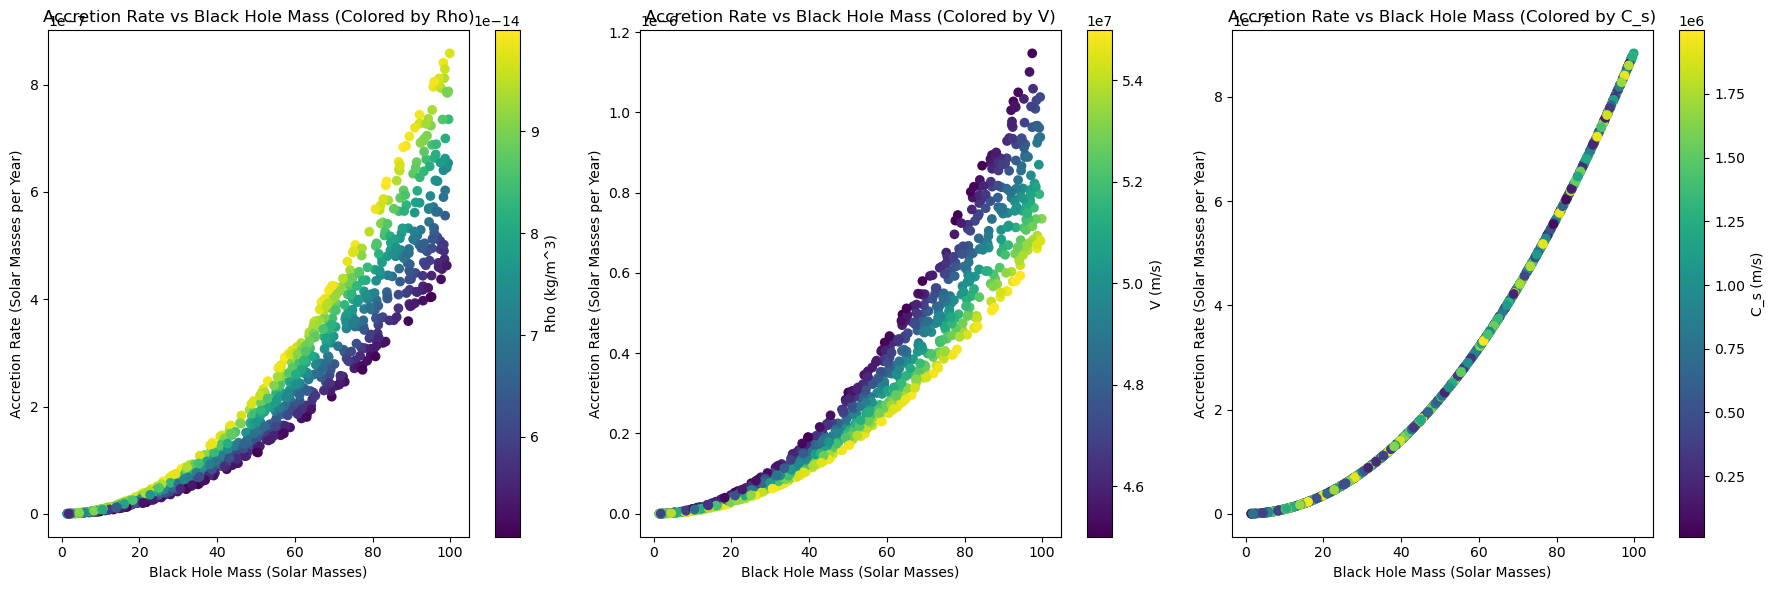

In [112]:
'''Plot Accretion Rate in term of Black Hole Masses with varies Parameters'''
# Randomize one parameter at a time, keeping the others fixed
num_points = 1000
fixed_rho = 1e-13  # Fixed density
fixed_v = 5e7      # Fixed relative velocity
fixed_c_s = 1e5    # Fixed sound speed

# Randomize black hole masses
black_hole_masses = np.random.uniform(1, 100, num_points)

# Randomizing rho while keeping v and c_s fixed
rho_values = np.random.uniform(5e-14, 1e-13, num_points)
accretion_rates_rho = [calculate_accretion_rate(mass, rho=rho, v=fixed_v, c_s=fixed_c_s) for mass, rho in zip(black_hole_masses, rho_values)]

# Randomizing v while keeping rho and c_s fixed
v_values = np.random.uniform(4.5e7, 5.5e7, num_points)
accretion_rates_v = [calculate_accretion_rate(mass, rho=fixed_rho, v=v, c_s=fixed_c_s) for mass, v in zip(black_hole_masses, v_values)]

# Randomizing c_s while keeping rho and v fixed
c_s_values = np.random.uniform(1e4, 2e6, num_points)
accretion_rates_c_s = [calculate_accretion_rate(mass, rho=fixed_rho, v=fixed_v, c_s=c_s) for mass, c_s in zip(black_hole_masses, c_s_values)]



plt.figure(figsize=(18, 6))

# Scatter plot for rho
plt.subplot(131)
plt.scatter(black_hole_masses, accretion_rates_rho, c=rho_values, cmap='viridis')
plt.colorbar(label='Rho (kg/m^3)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by Rho)')

# Scatter plot for v
plt.subplot(132)
plt.scatter(black_hole_masses, accretion_rates_v, c=v_values, cmap='viridis')
plt.colorbar(label='V (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by V)')

# Scatter plot for c_s
plt.subplot(133)
plt.scatter(black_hole_masses, accretion_rates_c_s, c=c_s_values, cmap='viridis')
plt.colorbar(label='C_s (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Accretion Rate (Solar Masses per Year)')
plt.title('Accretion Rate vs Black Hole Mass (Colored by C_s)')

plt.tight_layout()
plt.show()


According to the output plots, adjust the randomization to an acceptable range, and update the function calculate_accretion_rate with these randomization range.

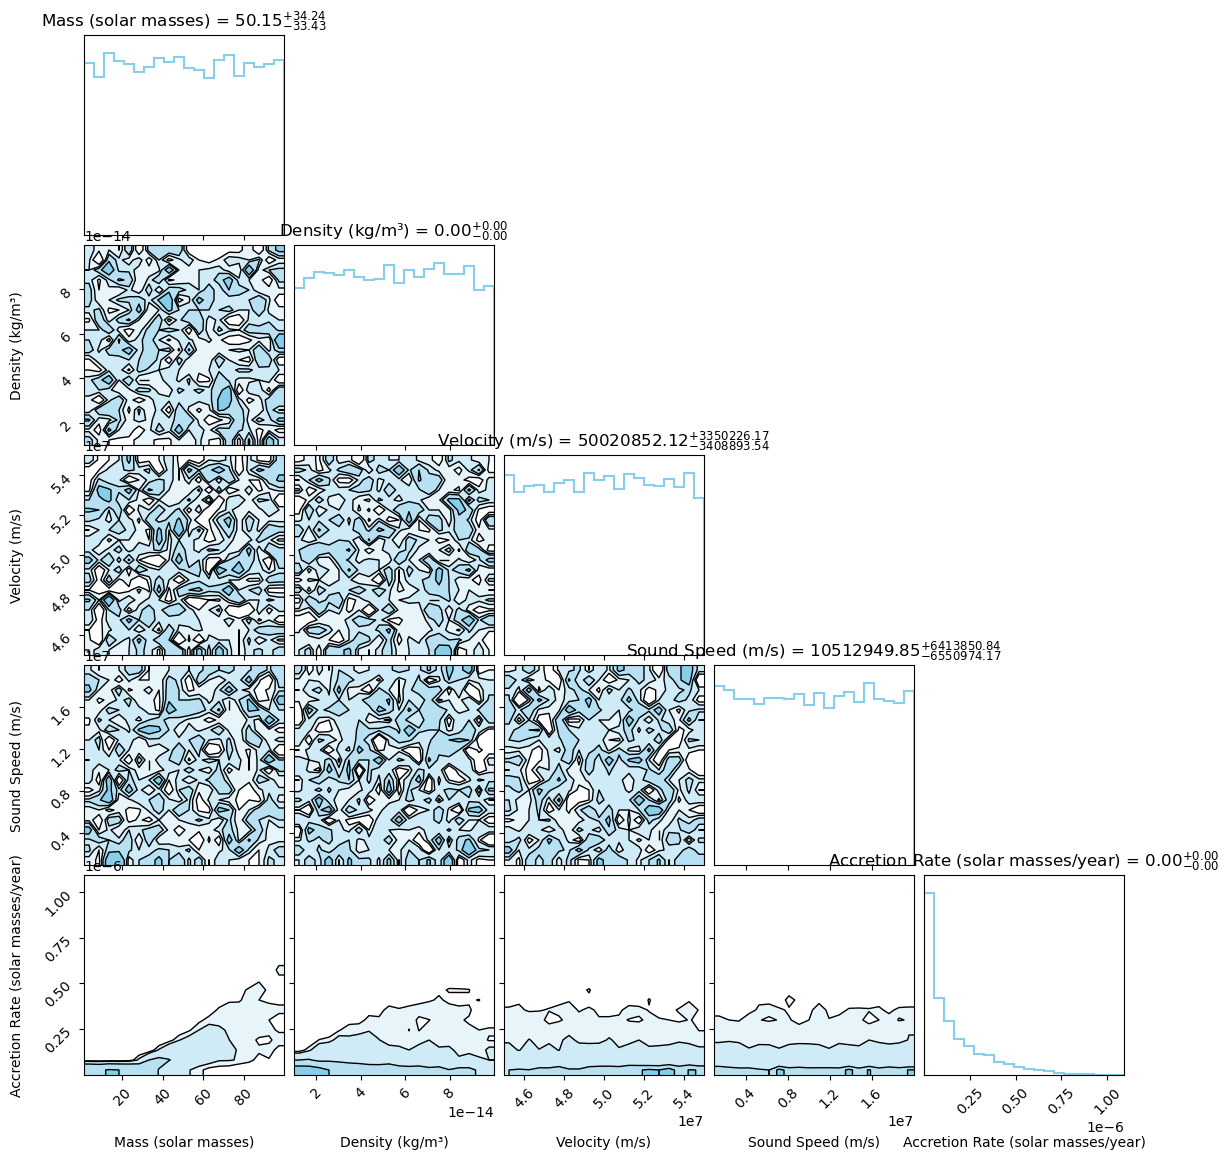

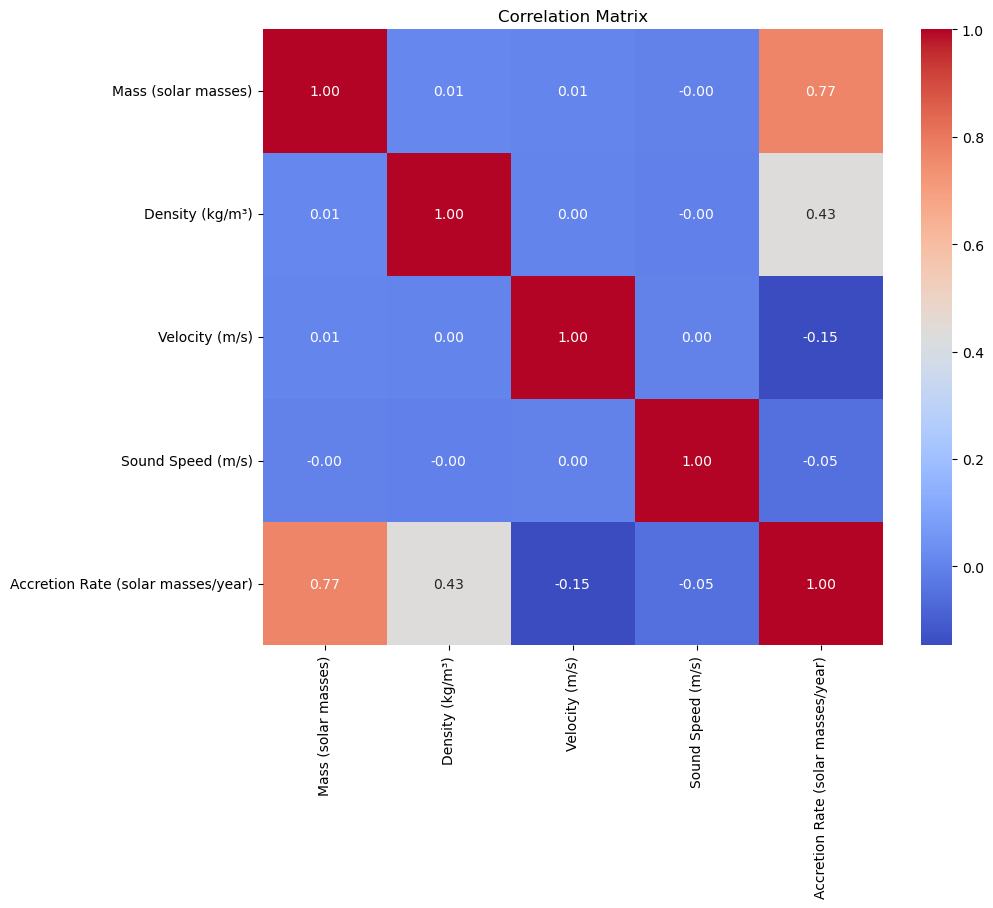

Correlation Matrix:
Mass (solar masses): [ 1.          0.01104955  0.0081355  -0.00201125  0.76987486]
Density (kg/m³): [ 0.01104955  1.          0.00226745 -0.00473387  0.43432878]
Velocity (m/s): [ 8.13549795e-03  2.26745355e-03  1.00000000e+00  3.70909177e-04
 -1.47239019e-01]
Sound Speed (m/s): [-2.01124530e-03 -4.73386867e-03  3.70909177e-04  1.00000000e+00
 -5.11943843e-02]
Accretion Rate (solar masses/year): [ 0.76987486  0.43432878 -0.14723902 -0.05119438  1.        ]


In [126]:
# observe the correlation between black hole mass, density of ambient object, relative 
# velocity between the object and the ambient medium, and Sound speed of the ambient medium
def pearson_correlation(x, y):
    """
    Calculates the Pearson correlation coefficient between two arrays x and y.
    """
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

    return numerator / denominator if denominator != 0 else 0

# Monte Carlo Simulation Parameters
num_simulations = 10000
black_hole_mass_range = (1, 100)  # in solar masses
rho_range = (1e-14, 1e-13)  # in kg/m^3
v_range = (4.5e7, 5.5e7)  # in m/s
c_s_range = (1e6, 2e7)  # in m/s

masses = np.random.uniform(*black_hole_mass_range, num_simulations)
rhos = np.random.uniform(*rho_range, num_simulations)
vs = np.random.uniform(*v_range, num_simulations)
c_ss = np.random.uniform(*c_s_range, num_simulations)
accretion_rates = np.array([calculate_accretion_rate(m, rho, v, c_s) for m, rho, v, c_s in zip(masses, rhos, vs, c_ss)])

data = np.vstack([masses, rhos, vs, c_ss, accretion_rates]).T

# Labels for each parameter
labels = ['Mass (solar masses)', 'Density (kg/m³)', 'Velocity (m/s)', 'Sound Speed (m/s)', 'Accretion Rate (solar masses/year)']

figure = corner.corner(data, labels=labels, show_titles=True, title_kwargs={"fontsize": 12},
                       color='skyblue',
                       hist_kwargs={'density': True, 'histtype': 'step', 'linewidth': 1.5},
                       plot_density=True,
                       plot_datapoints=False,
                       fill_contours=True,
                       contour_kwargs={'colors': 'black', 'linewidths': 1})
plt.show()


# Plotting the correlation matrix
labels = ['Mass (solar masses)', 'Density (kg/m³)', 'Velocity (m/s)', 'Sound Speed (m/s)', 'Accretion Rate (solar masses/year)']
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print("Correlation Matrix:")
for i, label in enumerate(labels):
    print(f"{label}: {correlation_matrix[i]}")

Here I run 10000 times monte carlo simulation to explore the correlation between our interested parameters. This is as what was expected: the mass of black hole contributes significantly to the accretion rate. However, note that the density also has a relatively high correlation with the accretion rate comparing to other parameters, so I should keep this in mind in the future work.

### 2. Radiation
Since radiation is emitted by the accretion process as luminosity, it is important to consider the radiation in doing the modeling. The luminosity is typically calculated by (https://en.wikipedia.org/wiki/Luminosity#:~:text=Luminosity%20is%20an%20absolute%20measure,galaxy%2C%20or%20other%20astronomical%20objects.)
$$Radiation = \epsilon \times \dot{M} \times 1.98847 \times 10^{30} \times c^2$$
where
\begin{align}
\dot{M} & : \text{Efficiency factor - typically around 0.1 for non-rotating black holes} \\
c & : \text{speed of light} \\
R_{acc} & : \text{accretion rate} \\
\end{align}


In [98]:
def calculate_radiation(accretion_rate, epsilon = 0.1):
    '''
    The accretion rate is obtained from the previous function calculate_accretion_rate
    '''
    c = 299792458 * u.m / u.s

    # calculate the luminosity (or radiation)
    radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass

    return radiation


In [99]:
# Test the function calculate_radiation
print(calculate_radiation(calculate_accretion_rate(100)))

4.7190308957700396e+32 m2 yr / s3


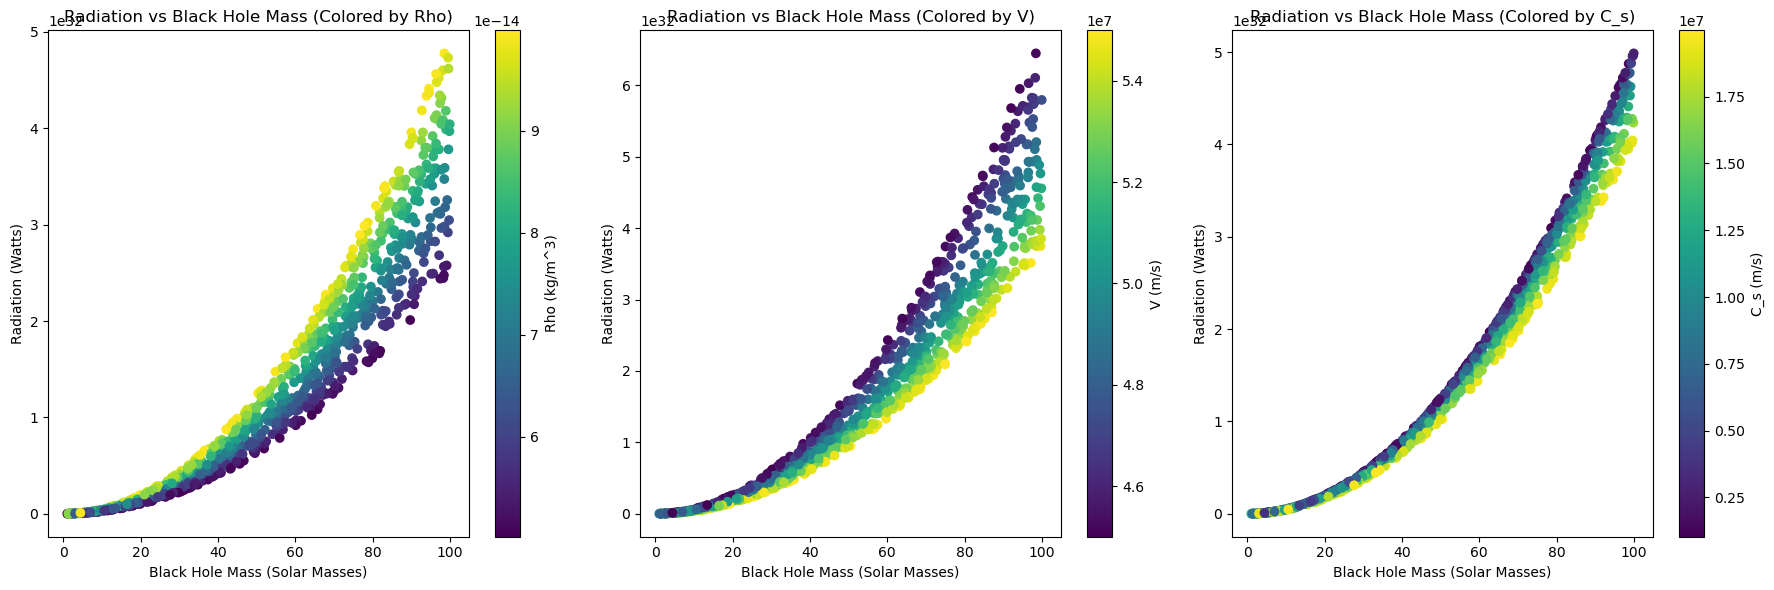

In [106]:
'''Plot Radiation in term of Black Hole Masses with varies Parameters'''
# Randomize the parameters and calculate accretion rates and radiation
num_points = 1000
fixed_rho = 1e-13  # Fixed density
fixed_v = 5e7      # Fixed relative velocity
fixed_c_s = 5e6    # Fixed sound speed

# Randomize black hole masses
black_hole_masses = np.random.uniform(1, 100, num_points)

# Randomizing rho while keeping v and c_s fixed
rho_values = np.random.uniform(5e-14, 1e-13, num_points)
accretion_rates_rho = [calculate_accretion_rate(mass, rho=rho, v=fixed_v, c_s=fixed_c_s) for mass, rho in zip(black_hole_masses, rho_values)]
radiation_rho = [calculate_radiation(rate) for rate in accretion_rates_rho]

# Randomizing v while keeping rho and c_s fixed
v_values = np.random.uniform(4.5e7, 5.5e7, num_points)
accretion_rates_v = [calculate_accretion_rate(mass, rho=fixed_rho, v=v, c_s=fixed_c_s) for mass, v in zip(black_hole_masses, v_values)]
radiation_v = [calculate_radiation(rate) for rate in accretion_rates_v]

# Randomizing c_s while keeping rho and v fixed
c_s_values = np.random.uniform(1e6, 2e7, num_points)
accretion_rates_c_s = [calculate_accretion_rate(mass, rho=fixed_rho, v=fixed_v, c_s=c_s) for mass, c_s in zip(black_hole_masses, c_s_values)]
radiation_c_s = [calculate_radiation(rate) for rate in accretion_rates_c_s]

radiation_rho = [x.value for x in radiation_rho]
radiation_v = [x.value for x in radiation_v]
radiation_c_s = [x.value for x in radiation_c_s]

# Plotting the results
plt.figure(figsize=(18, 6))

# Scatter plot for radiation vs black hole mass (Colored by Rho)
plt.subplot(131)
plt.scatter(black_hole_masses, radiation_rho, c=rho_values, cmap='viridis')
plt.colorbar(label='Rho (kg/m^3)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by Rho)')

# Scatter plot for radiation vs black hole mass (Colored by V)
plt.subplot(132)
plt.scatter(black_hole_masses, radiation_v, c=v_values, cmap='viridis')
plt.colorbar(label='V (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by V)')

# Scatter plot for radiation vs black hole mass (Colored by C_s)
plt.subplot(133)
plt.scatter(black_hole_masses, radiation_c_s, c=c_s_values, cmap='viridis')
plt.colorbar(label='C_s (m/s)')
plt.xlabel('Black Hole Mass (Solar Masses)')
plt.ylabel('Radiation (Watts)')
plt.title('Radiation vs Black Hole Mass (Colored by C_s)')

plt.tight_layout()
plt.show()

### 3. jet production
The jet which emits energy is determined by many factor and is usually very hard to model, so we here assume a simpler case where the jets are produced when the accretion rate and radiation exceed certain limit. We assume the limits to be:

1. accretion rate thershold = $10^{-4}$ solar mass per year
2. radiation thershold = $10^{36}$ watts

In [50]:
def determine_jet_production(accretion_rate, radiation):
    # Limits when jet production takes place
    accretion_rate_threshold = 1e-4  # in solar masses per year
    radiation_threshold = 1e36

    # Determine jet production
    jets = accretion_rate > accretion_rate_threshold and radiation > radiation_threshold
    return jets
    # returns true or false

In [55]:
# Examples for determine_jet_production
print(determine_jet_production(1e-7, 1e20)) # neither parameter exceeds the limit
print(determine_jet_production(1, 1e30)) # the accretion rate exceeds the limit
print(determine_jet_production(1e-5, 1e40)) # the radiation exceeds the limit
print(determine_jet_production(1, 1e40)) # both exceeds the limit

False
False
False
True


### combining the three function

In [56]:
def accretion_model(black_hole_mass, accretion_radius, other_parameters):
    accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
    radiation = calculate_radiation(accretion_rate, other_parameters)
    jets = determine_jet_production(accretion_rate, radiation, other_parameters)

    return accretion_rate, radiation, jets

Now I can add these functions to the original class as the first part of the code:

In [108]:
class Galaxy:
    '''initialize the galaxy'''
    def __init__(self, mass, position, velocity, black_hole_mass):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.black_hole_mass = black_hole_mass
    
    '''black hole accretion model'''
    def calculate_accretion_rate(black_hole_mass, 
                                 rho = np.random.uniform(1e-14, 1e-13), 
                                 v = np.random.uniform(4.5e7, 5.5e7), 
                                 c_s = np.random.uniform(1e6, 2e7)):
        # The input black hole mass should in the unit of solar mass
        G = 6.67430e-11 * u.m**3 / u.kg / u.s**2 # gravitational constant with u.m**3 / u.kg / u.s**2
        M = black_hole_mass * 1.98847e30 * u.kg  # solar masses to kg
        rho = rho * u.kg / u.m**3  # density of the accreting material in kg/m^3
        v = v * u.m / u.s  # relative velocity in m/s
        c_s = c_s * u.m / u.s # sound speed in the material in m/s
        # Bondi-Hoyle-Lyttleton accretion rate
        accretion_rate = (4 * np.pi * G**2 * M**2 * rho) / ((v**2 + c_s**2)**(3/2))
        # Convert accretion rate to solar masses per year
        accretion_rate_solar_masses_per_year = accretion_rate.to(u.kg / u.s) / (1.98847e30 * u.kg) * (60*60*24*365) * u.year
        return accretion_rate_solar_masses_per_year
    
    def calculate_radiation(accretion_rate, epsilon = 0.1):
        # The accretion rate is obtained from the previous function calculate_accretion_rate
        c = 299792458 * u.m / u.s
        # calculate the luminosity (or radiation)
        radiation = epsilon * accretion_rate * 1.98847e30 * c**2  # Convert accretion rate back to kg/s from solar mass
        return radiation
    
    def accretion_model(black_hole_mass, accretion_radius, other_parameters):
        accretion_rate = calculate_accretion_rate(black_hole_mass, accretion_radius, other_parameters)
        radiation = calculate_radiation(accretion_rate, other_parameters)
        jets = determine_jet_production(accretion_rate, radiation, other_parameters)
        return accretion_rate, radiation, jets
    
    # Gas Dynamics and Interstellar Medium
    def gas_dynamics(galaxy):
        '''
        This models the impliment model of the dynamics of gas in and around the galaxies
        The processes like cooling, heating, and interaction with AGN radiation should be considered
        '''
        pass
    
    # Galaxy Interaction and Dynamics
    def update_galaxy_dynamics(galaxies):
        '''
        Implement gravitational interactions between galaxies.
        Update positions and velocities based on gravitational forces.
        '''
        pass

## B) Cooling and Heating
According to my research of other people's work, the fully modeled dynamic of mass cannot be easily computed from a local computer and requires much more computation work. Thus, for my work, I will be creating a easier model with more idealized condition than what is actually happening in AGN galaxies but keep all the key concepts in AGN gas dynamics simulation. 

The temperature change within the galaxy is another important thing to consider. From previous study (Li et al 2016), they analyzed a battle between radiative cooling and AGN heating. Thus the cooling and heating are happening at the same time within the AGN host galaxy. That being said, we want to set different rate of cooling and heating in terms of other parameters.

This is complex as a lot of parameters could contribute to the cooling/ heating rates, such as mass, cooling coefficient, environment, AGN activity, and many more. We here consider some of the most significant factor in cooling and heating, which are:

1. **density**: Cooling processes in the ISM are significantly influenced by the gas's density, and it is usually proportional to density square
2. **cooling coefficient**
3. **temperature**: Cooling processes in the ISM are inversely proportional to temperature
4. **time**: The rate might decrease over time as the galaxy loses energy
5. **composition**: The composition of AGN galaxies are really hard to determine, I will keep this away from the simulation for now, but may come back to it as this project becomes more developed
6. **metallicity**
7. **star formation rate**
8. **AGN luminosity**: this was calculated above with the radiation

In [147]:
# combining what has been discussed above, cooling rate is proportional to density^2, 
# and inversely proportional to time and temperature
def cooling_function(temperature):
    if temperature < 1e4:
        # Low-temperature regime
        new_temp = 1e-22 * temperature
        return new_temp
    else:
        # High-temperature regime
        new_temp = 1e-24 * temperature**1.5
        return new_temp

def heating_function(star_formation_initial, agn_luminosity_initial, density, time):
    decay_factor = 0.5  # Represents a decay over time
    # Star formation rate and AGN luminosity decrease over time
    star_formation_rate = star_formation_initial / (1 + decay_factor * time)
    agn_luminosity = agn_luminosity_initial / (1 + decay_factor * time)

    return 1e-35 * (star_formation_rate + agn_luminosity) * density

def cooling_rate(new_temp, density):
    cooling_rate = new_temp * density**2
    return cooling_rate

def ism_temperature_evolution(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time):
    temperature = initial_temperature

    for time in range(total_time):
        # cooling and heating rates
        cooling_rate = cooling_function(temperature) * density**2
        heating_rate = heating_function(star_formation_rate, agn_luminosity, density, time)

        # Update temperature
        temperature_change = (heating_rate - cooling_rate) * timestep
        temperature += temperature_change

        if temperature < 10:  # 10 K is a reasonable lower limit for ISM temperatures
            temperature = 10

    return temperature

In [158]:
# Test the function
initial_temperature = 10000  # in Kelvin
density = 1.0e-10  # in particles per cubic centimeter
metallicity = 1.0  # Solar metallicity
star_formation_rate = 2.0  # Solar masses per year
agn_luminosity = 1e44  # in ergs per second
timestep = 1e6  # in years
total_time = 1000  # number of timesteps
final_temperature = ism_temperature_evolution(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time)
print(f"Final ISM Temperature: {final_temperature} K")

Final ISM Temperature: 1307293.9723098695 K


In [159]:
def ism_temperature_evolution_over_time(initial_temperature, 
                                        density, 
                                        metallicity, 
                                        star_formation_initial, 
                                        agn_luminosity_initial, 
                                        timestep, 
                                        total_time):
    temperature = initial_temperature
    temperatures, cooling_rates, heating_rates = [], [], []

    for time in range(total_time):
        cooling_rate = cooling_function(temperature) * density**2
        heating_rate = heating_function(star_formation_initial, agn_luminosity_initial, density, time)

        temperature_change = (heating_rate - cooling_rate) * timestep
        temperature += temperature_change
        if temperature < 10:
            temperature = 10

        temperatures.append(temperature)
        cooling_rates.append(cooling_rate)
        heating_rates.append(heating_rate)

    return temperatures, cooling_rates, heating_rates

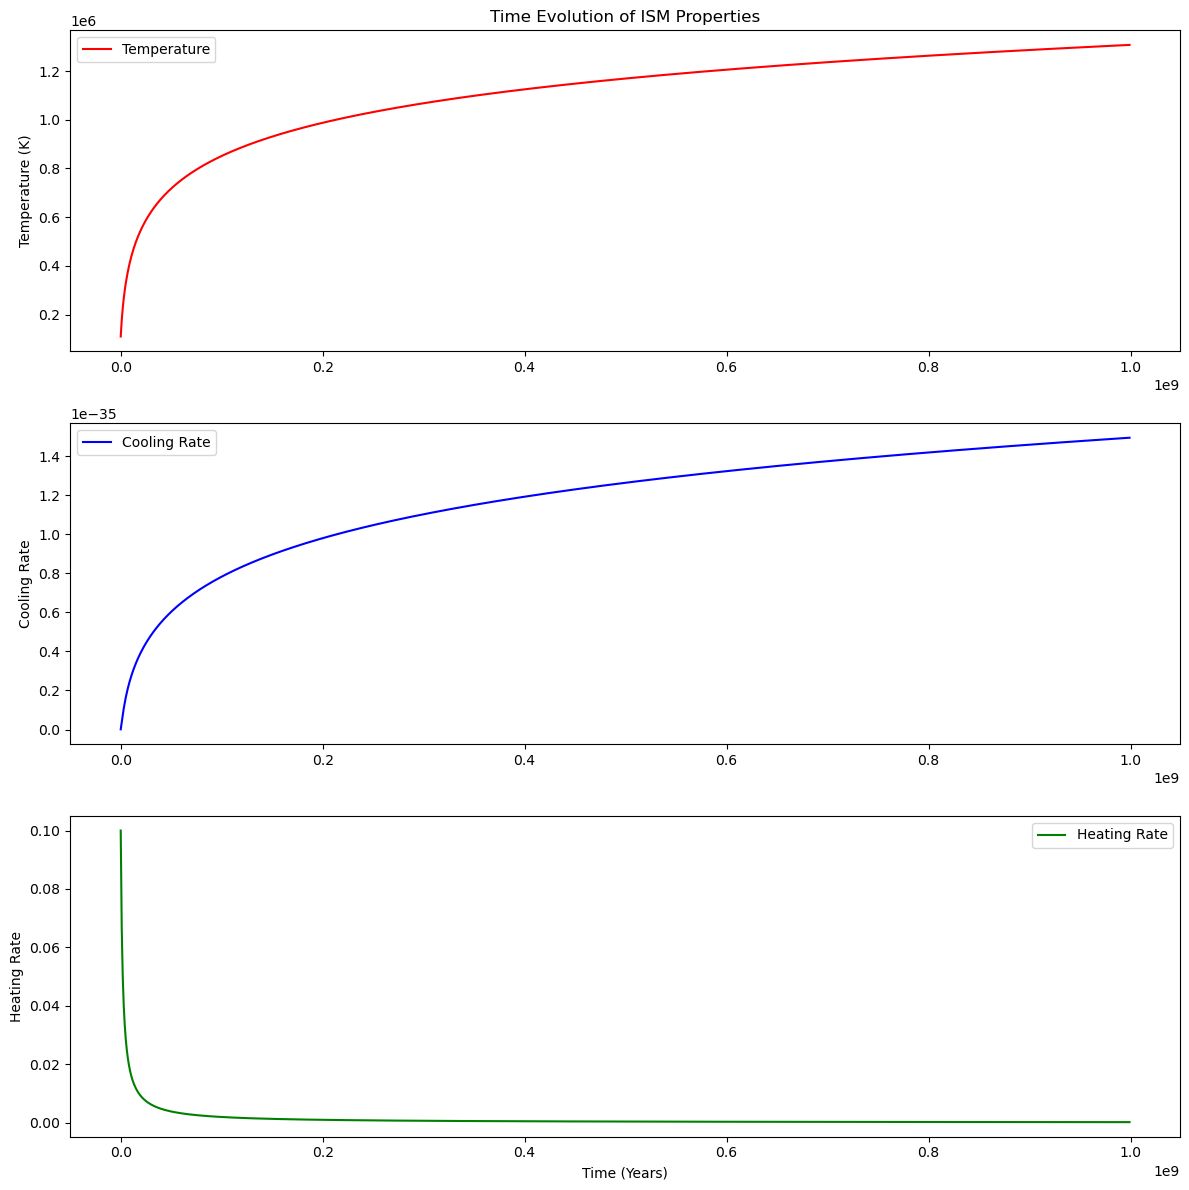

In [160]:
# Run the simulation
temperatures, cooling_rates, heating_rates = ism_temperature_evolution_over_time(initial_temperature, density, metallicity, star_formation_rate, agn_luminosity, timestep, total_time)

# Time axis
time_axis = [timestep * i for i in range(total_time)]

# Plotting
plt.figure(figsize=(12, 12))

# Temperature plot
plt.subplot(3, 1, 1)
plt.plot(time_axis, temperatures, label='Temperature', color='red')
plt.ylabel('Temperature (K)')
plt.title('Time Evolution of ISM Properties')
plt.legend()

# Cooling rate plot
plt.subplot(3, 1, 2)
plt.plot(time_axis, cooling_rates, label='Cooling Rate', color='blue')
plt.ylabel('Cooling Rate')
plt.legend()

# Heating rate plot
plt.subplot(3, 1, 3)
plt.plot(time_axis, heating_rates, label='Heating Rate', color='green')
plt.ylabel('Heating Rate')
plt.xlabel('Time (Years)')
plt.legend()

plt.tight_layout()
plt.show()